In [124]:
#%%
import datetime
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [125]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d%b%Y:%H:%M:%S')
series= pd.read_csv('AIL.csv',parse_dates=True,squeeze=True,index_col=0,header=0)
df=pd.read_csv('AIL.csv')
series.head()

Date_Begin_Local
2010-01-01 00:00:00    8307.0
2010-01-01 01:00:00    8186.0
2010-01-01 02:00:00    8075.0
2010-01-01 03:00:00    8013.0
2010-01-01 04:00:00    7982.0
Name: ACTUAL_AIL, dtype: float64

# Data Visualisation
## Line Plot
Below is a line plot of Alberta Internal Load time series from 2010 to november 2021.

Text(0, 0.5, 'AIL (MWh)')

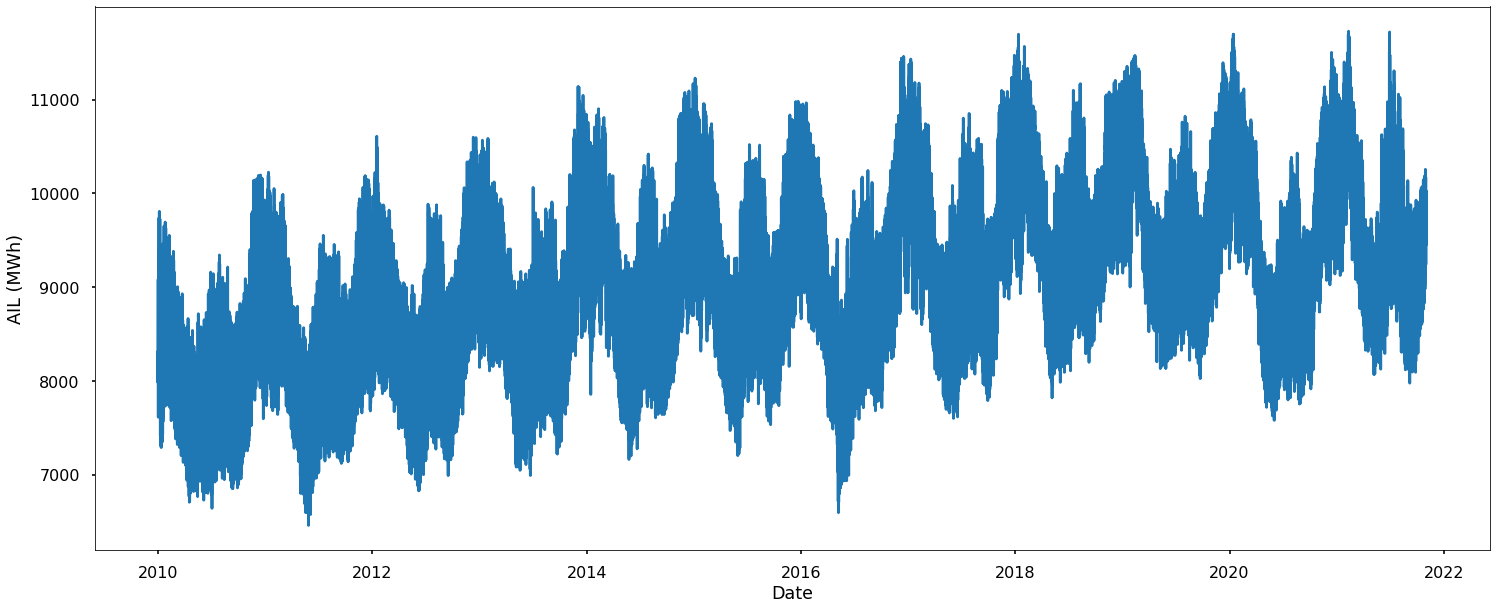

In [82]:
plt.style.use( 'seaborn-poster')
plt.rcParams["figure.figsize"] = (25,10)
ax0=sns.lineplot(x=series.index, y=series.values)
ax0.set_xlabel('Date')
ax0.set_ylabel('AIL (MWh)')
# for scattedr plot :
# series.plot(style='b.')

# Histogram and density plot
Distribution of the observations are important visualization in time series. Some forecasting models assume normal distribution of the observations. It is useful to check and see what type of distribution our time series have. From the plot below we can see that our data has a distribution close to normal distribution. 

Text(0, 0.5, 'Count')

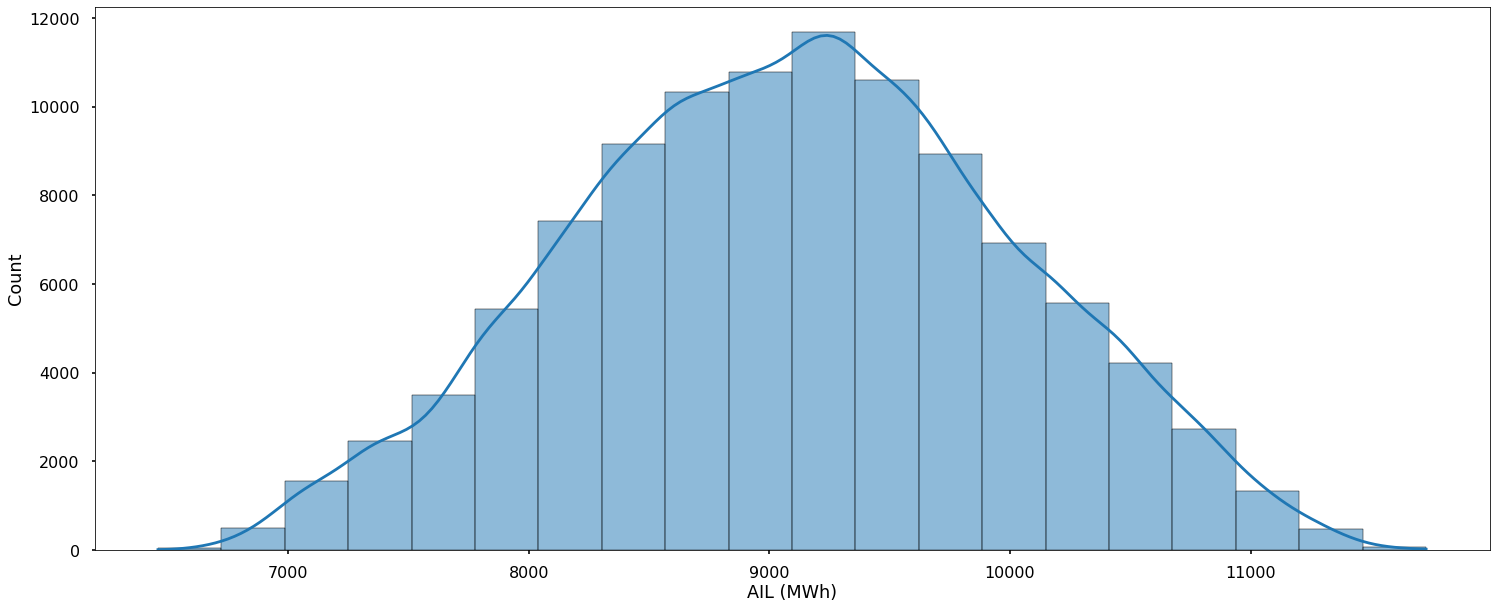

In [58]:
ax1=sns.histplot(series, kde=True, bins=20)
ax1.set_xlabel('AIL (MWh)')
ax1.set_ylabel('Count')

# Box and Whisker Plots
This plot draws a box around the 25th and 75th precentiles of the data that captures the middle 50% of the observations.The dots outside the whiskers show the outliers. Here we plot the boxes once groped by year and once grouped monthly.

Text(0.5, 0, 'Year')

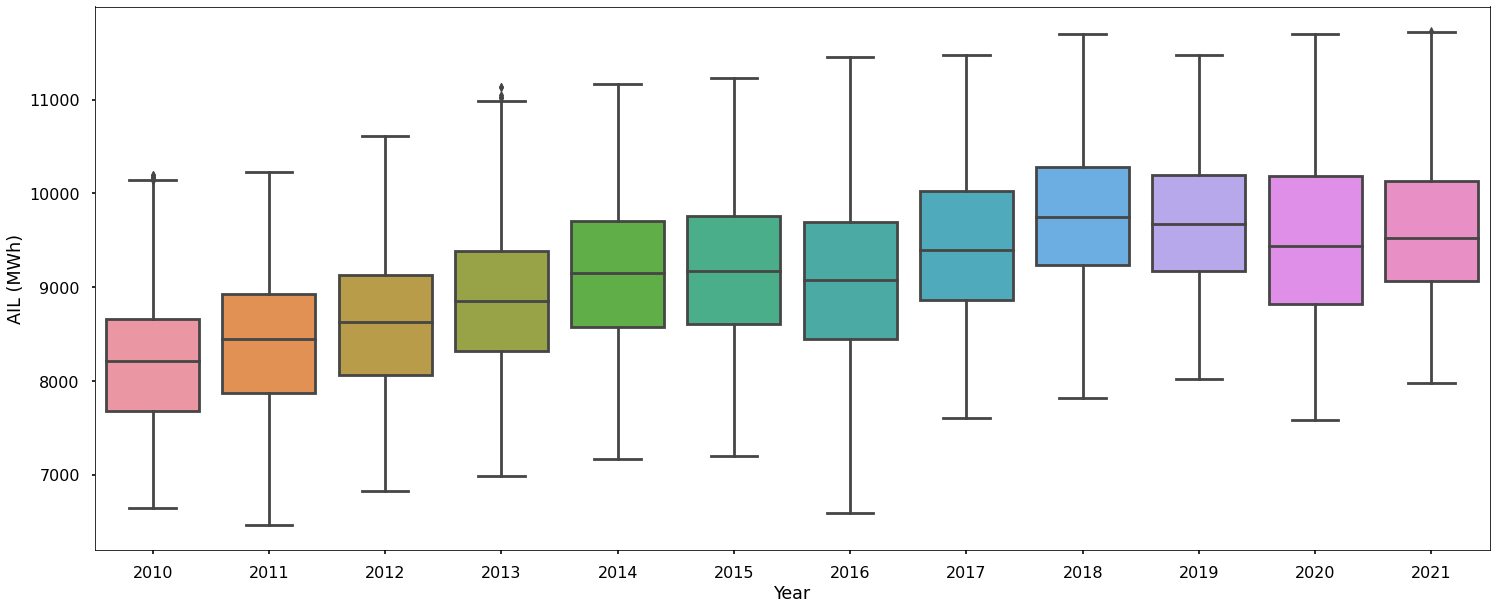

In [84]:
ax2=sns.boxplot(x=series.index.year, y=series)
ax2.set_ylabel('AIL (MWh)')
ax2.set_xlabel('Year')

Text(0.5, 0, 'Month')

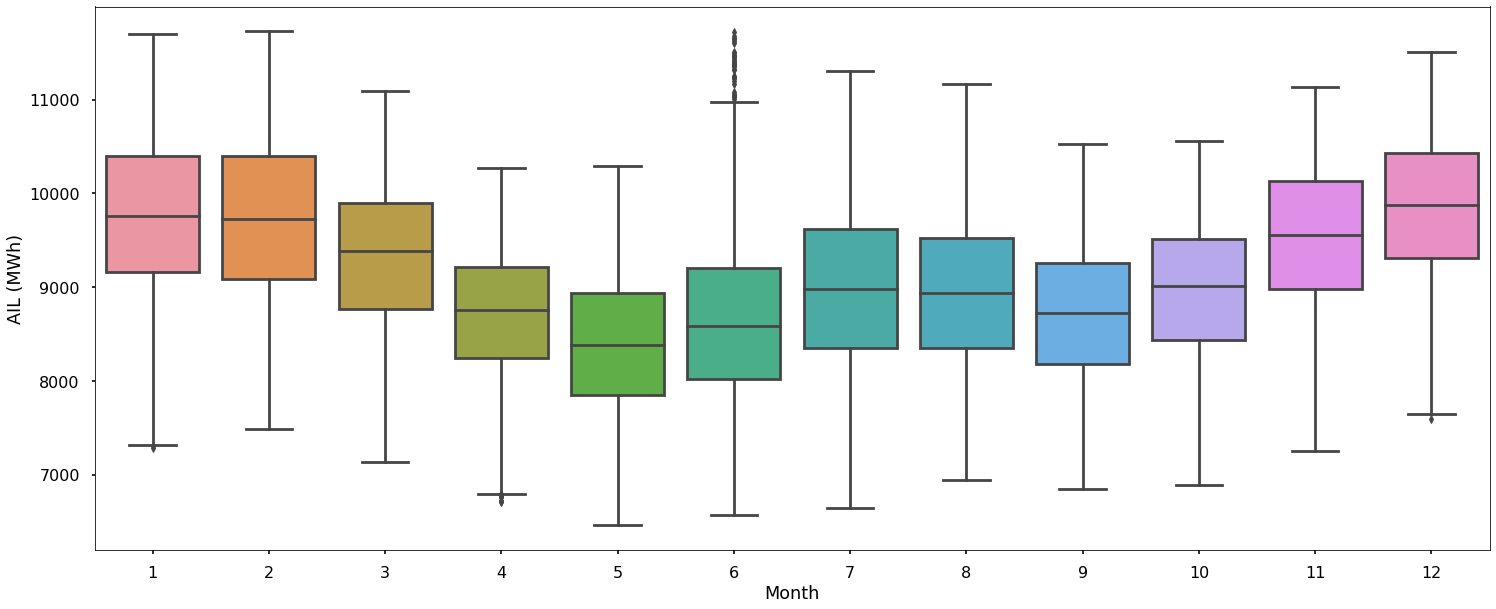

In [85]:
ax3=sns.boxplot(x=series.index.month, y=series)
ax3.set_ylabel('AIL (MWh)')
ax3.set_xlabel('Month')


# Lag Scatter plot
In time series modeling we assume there is a relationship beteen an observation and its previous observation. A useful type of plot in time series analysis is a scatter plot of the observations and their lag observations. The cluster could have positive or negative correlation relationship. 

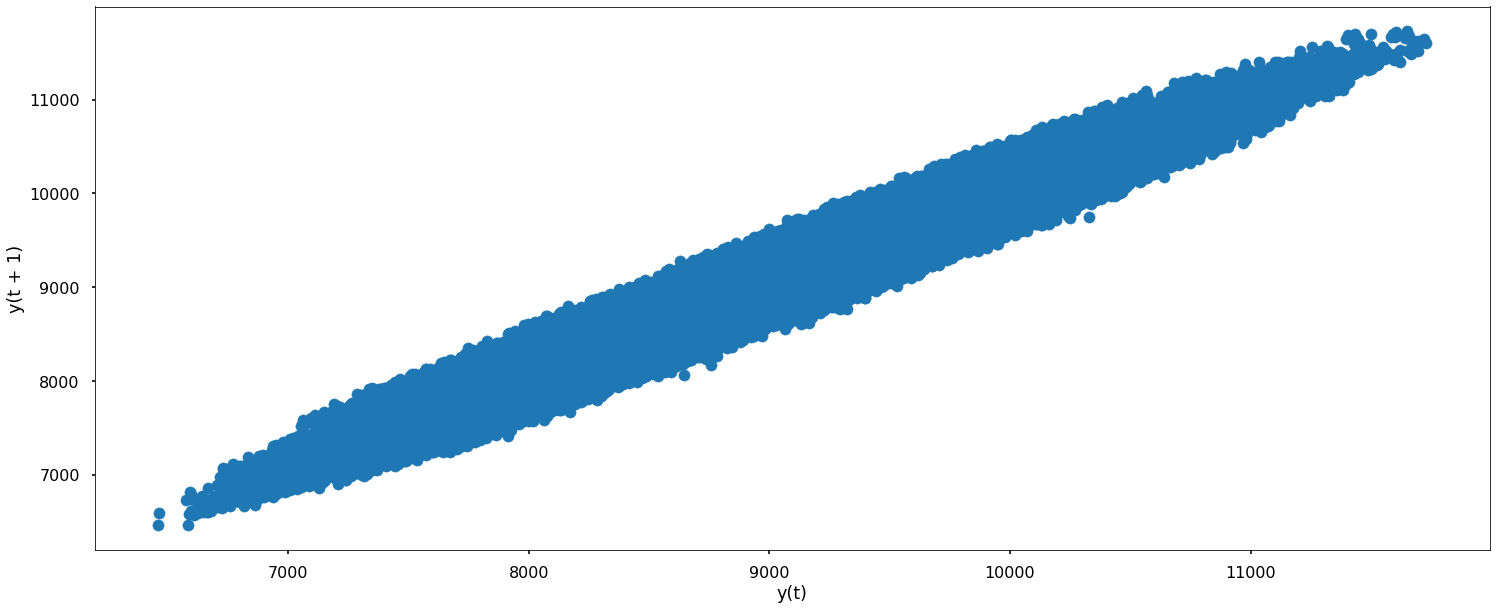

In [87]:
ax4=pd.plotting.lag_plot(series)

As we can see this data shows positive correlation relationship for lag 1 observations.

# Autocorrelation Plots
The strenght and type of relationship between the observations can be quantified using autocorrelation. The autocorrelation results in numbers between -1 and one. -1 and 1 show strong negative and positive correlation between the observations.The following graph shows this plot for one month of data from our series. The sine waves are strong sign of seasonality.

Text(0.5, 1.0, 'Autocorrelation plot for AIL for 6-2019')

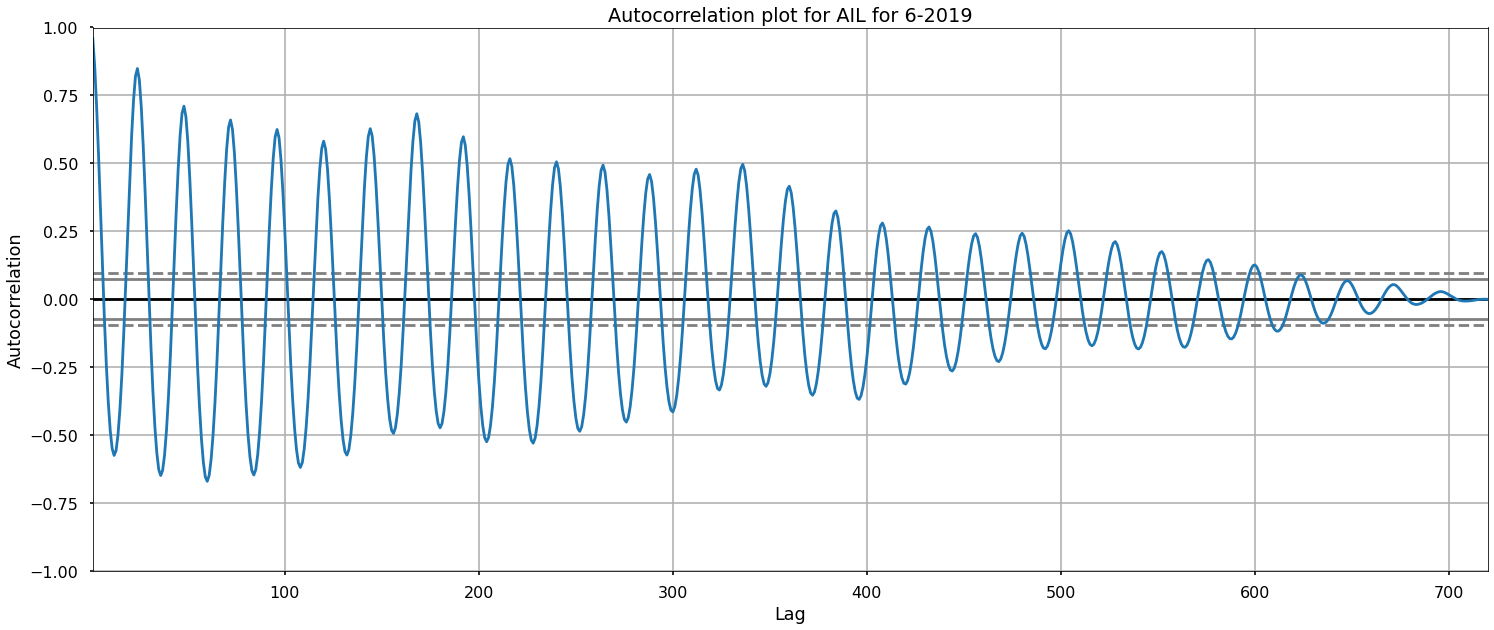

In [126]:
year=2019
month=6
series_sample_month=series.loc[(series.index.year==year) & (series.index.month==month) ]
ax5=pd.plotting.autocorrelation_plot(series_sample_month)
plt.title("Autocorrelation plot for AIL for {}-{}".format(month,year))

And below is the same graph for one year data: 

Text(0.5, 1.0, 'Autocorrelation plot for AIL for 2019')

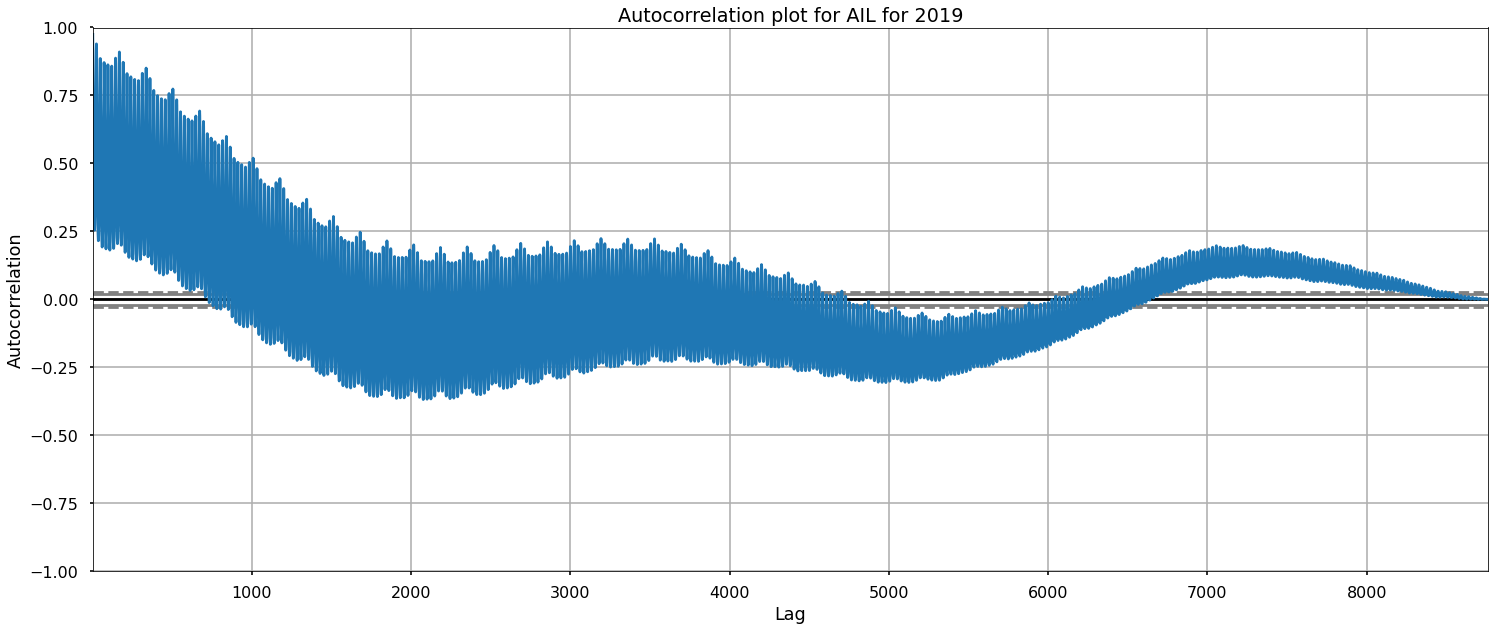

In [132]:
year=2019
series_sample_year=series.loc[series.index.year==year ]
ax5=pd.plotting.autocorrelation_plot(series_sample_year)
plt.title("Autocorrelation plot for AIL for {}".format(year))

# Time Series Decomposition

## Automatic Time Series Decomposition
Decomposition involves thinking of the time series as a combination of  level, seasonality, trend and noise components. A given time series is assumed to have three non-systematic (recurrent) components:<br>
  **Level**: The average value in the series
 <br> **Trend**: The increasing or decreasing value in the series
 <br> **Seasonality**: The repeating short-term cysle in the series
 <br> **Noise**: The random variation in the series
